In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\91934\Downloads\data-en-hi-de-fr.csv")
df.head()

,labels,text,text_hi,text_de,text_fr
0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   text     5572 non-null   object
 2   text_hi  5572 non-null   object
 3   text_de  5572 non-null   object
 4   text_fr  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df=df.drop(['text_hi','text_de','text_fr'], axis=1)

In [5]:
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.duplicated().sum()

415

In [7]:
df=df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(5157, 2)

In [10]:
df.rename(columns={'labels':'target','text':'text'},inplace=True)
df.sample(5)

,target,text
2602,ham,Okie
993,ham,Up to ü... Ü wan come then come lor... But i d...
1911,ham,Becoz its &lt;#&gt; jan whn al the post ofic...
5283,ham,"Yeah, probably here for a while"
4178,ham,Ok lor then we go tog lor...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


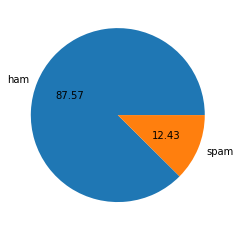

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
import nltk

In [16]:
df['num_char']=df['text'].apply(len)

In [17]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.104324,18.560016,1.965290
std,58.384729,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# ham
df[df['target'] == 0][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869796,17.267272,1.822852
std,56.710489,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#spam
df[df['target'] == 1][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [25]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

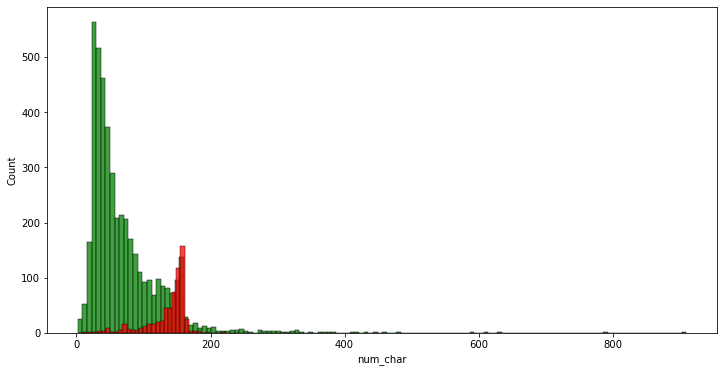

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'],color='green')
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

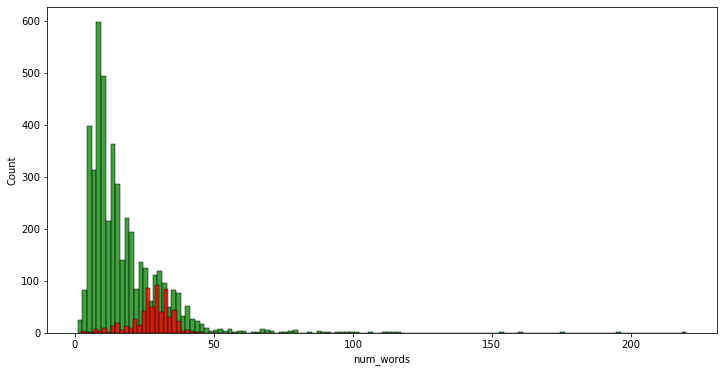

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='green')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

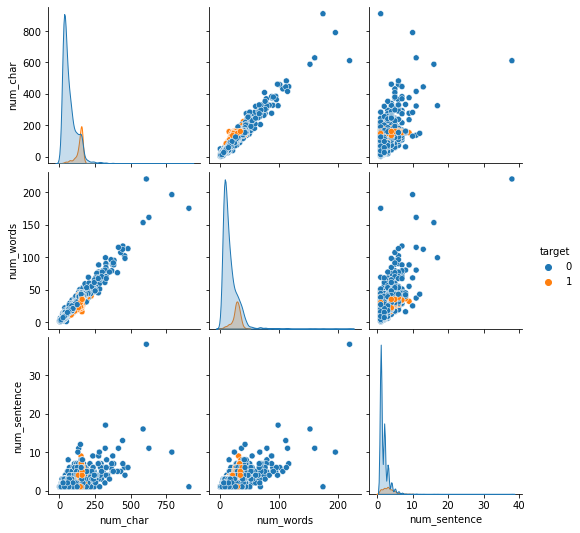

In [28]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

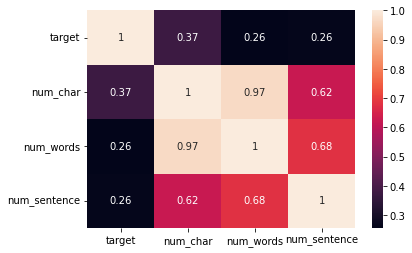

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
from nltk.corpus import stopwords
import string


# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    text = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    text = [i for i in text if i not in stop_words and i not in string.punctuation]

    # Stemming
    ps = PorterStemmer()
    text = [ps.stem(i) for i in text]

    # Join the processed words into a string
    return " ".join(text)


In [32]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [33]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [35]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91934\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
df['transform_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_char,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
df.head()

,target,text,num_char,num_words,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

9781

In [42]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


# model Building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [45]:
X.shape

(5157, 3000)

In [46]:
y = df['target'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [51]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[785 120]
 [ 17 110]]
0.4782608695652174


In [52]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709302325581395
[[905   0]
 [ 30  97]]
1.0


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [54]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [55]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [56]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [57]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9757751937984496, 0.9811320754716981)

In [58]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9718992248062015
Precision -  1.0
For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9786821705426356
Precision -  0.9906542056074766
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941


In [59]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [60]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.970930,1.000000
5,RF,0.971899,1.000000
8,ETC,0.978682,0.990654
0,SVC,0.975775,0.981132
9,GBDT,0.955426,0.976471
6,AdaBoost,0.966085,0.942308
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892
3,DT,0.936047,0.821053


In [61]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [62]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.970930
2,RF,Accuracy,0.971899
3,ETC,Accuracy,0.978682
4,SVC,Accuracy,0.975775
5,GBDT,Accuracy,0.955426
6,AdaBoost,Accuracy,0.966085
7,LR,Accuracy,0.958333
8,BgC,Accuracy,0.961240
9,DT,Accuracy,0.936047


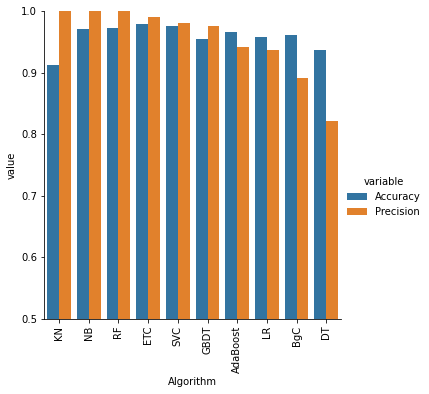

In [63]:
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [64]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [65]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [66]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [67]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [68]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [69]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000,0.970930,1.000000
2,RF,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000
3,ETC,0.978682,0.990654,0.978682,0.990654,0.978682,0.990654,0.978682,0.990654
4,SVC,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132,0.975775,0.981132
5,GBDT,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471,0.955426,0.976471
6,AdaBoost,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308,0.966085,0.942308
7,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
8,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892
9,DT,0.936047,0.821053,0.936047,0.821053,0.936047,0.821053,0.936047,0.821053


In [70]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [71]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [72]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [74]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [75]:
from sklearn.ensemble import StackingClassifier

In [76]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [77]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825581395348837
Precision 0.9739130434782609


In [78]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))